# Pymaceuticals Inc.
---

### Analysis

# We are analysing data related to Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications.
# This aanalysis is based on the data provided in two csv files Mouse_metdata.csv and Study_results.csv. Following are some summury points and conclusions that can be drawn from the analysis. 

# - Weight and Tumor Size: The data shows that as mice get heavier, their average tumor size tends to increase. This suggests a clear link between weight and tumor growth within the Capomulin treatment.
# - 
Weight Predicts Tumor Size: By looking at a mouse's weight, we can make a good guess about how big its tumor might be. The data provides a reliable way to estimate tumor size based on weight.# - 

Practical Insights: Understanding how weight affects tumor size is crucial for improving treatment plans within the Capomulin regimen. Considering weight when evaluating treatment outcomes can help tailor better therapies for patients.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how ='inner' )

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice.
mice_number = merge_df['Mouse ID'].value_counts().count()

#or may use 
#mice_number = merge_df['Mouse ID'].nunique()

# Display results
mice_number

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#dup_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

dup_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mouse_id = dup_mice['Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID.
# Identify duplicate mouse IDs (considering both 'Mouse ID' and 'Timepoint' for duplicates)
#dup_mouse_data = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
# Filter the DataFrame to get all data for those IDs
#dup_mouse_data = merge_df[merge_df['Mouse ID'].isin(duplicate_mice_id_df)]

# Display results
#dup_mouse_data


dup_mouse_data = merge_df[merge_df['Mouse ID'].isin(dup_mouse_id)]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice = merge_df[merge_df['Mouse ID'].isin(dup_mouse_id)==False]

# Display results
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = mouse_study_clean_df['Mouse ID'].nunique()

# Display results
total_mice_clean

248

## Summary Statistics

In [46]:
regimen_group = clean_mice.groupby("Drug Regimen")
regimen_group.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
9,f993,0,45.0,0,Naftisol,Male,21,28
10,z234,0,45.0,0,Naftisol,Female,19,27
11,b559,0,45.0,0,Naftisol,Male,20,26
13,x930,0,45.0,0,Naftisol,Male,13,26


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats = regimen_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

# Renaming the columns for clarity
regimen_group = clean_mice.groupby("Drug Regimen")
summary_stats = regimen_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev.', 'Tumor Volume Std. Err.']
summary_stats

# Assemble the resulting series into a single summary DataFrame.

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group = clean_mice.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = regimen_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# Re-name columns to perffered names 
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev.', 'Tumor Volume Std. Err.']
# Assemble the resulting series into a single summary DataFrame.
summary_stats

In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']) \
    .rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var':'Tumor Volume Variance', 'std':'Tumor Volume Std Dev.', 'sem': 'Tumor Volume Std. Err.'})


# Display Dataframe
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

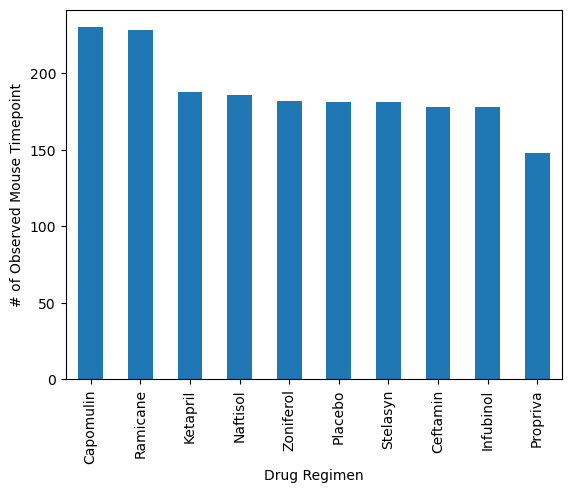

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = clean_mice[["Timepoint","Drug Regimen"]].groupby("Drug Regimen").count()
sorted_timepoints = total_timepoints.sort_values(["Timepoint"], ascending=False)
sorted_timepoints.plot(kind='bar', legend=None)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.show()

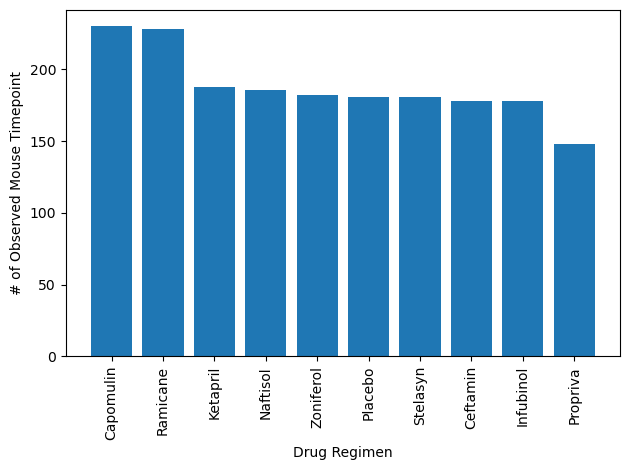

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(sorted_timepoints.index, sorted_timepoints["Timepoint"], alpha=1, align='center')
plt.xlabel('Drug Regimen')
plt.xticks (rotation='vertical')
plt.ylabel('# of Observed Mouse Timepoint')
plt.tight_layout()

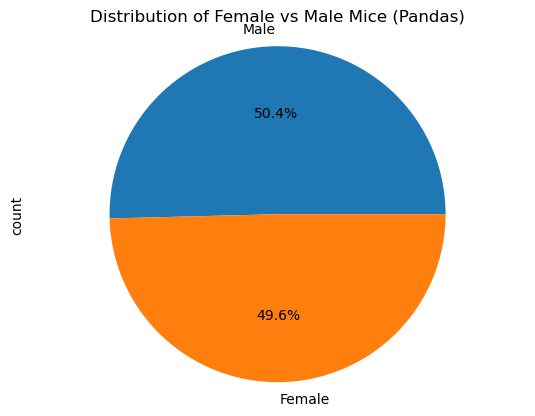

In [59]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mice.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Get the unique mice with their gender
gender_distribution = unique_mice_gender['Sex'].value_counts()

# Make the pie chart

gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Female vs Male Mice (Pandas)')
plt.show()


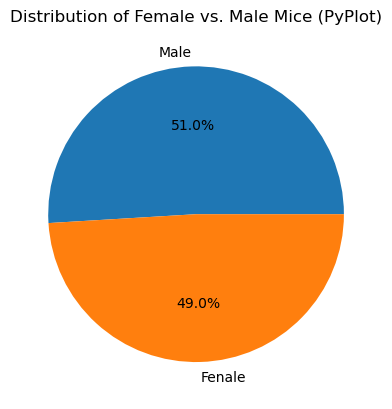

In [60]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_mice['Sex'].value_counts()
labels = ('Male', 'Fenale')

# Make the pie chart

plt.pie(mice_gender, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice (PyPlot)')
plt.show()


## Quartiles, Outliers and Boxplots

In [61]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = clean_mice.groupby("Mouse ID")["Timepoint"].max()

# Reset the index of greatest_timepoint DataFrame to prepare for merging
greatest_timepoint = greatest_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

great_merge = pd.merge(greatest_timepoint,clean_mice, on=["Mouse ID", "Timepoint"], how="inner")
great_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:

# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = great_merge.loc[great_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

# add subset
    tumor_vol_data.append(tumor_vol)
    
# Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
# Determine outliers using upper and lower bounds

    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

# Check for potential outliers
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

# Print results
    if potential_outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers:\n{potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


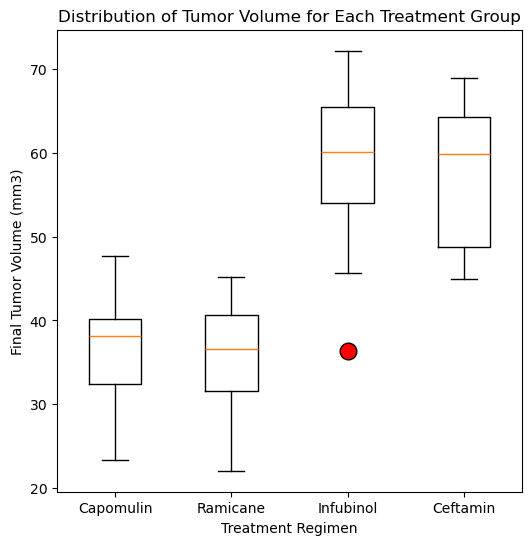

In [73]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = tumor_vol_data

plt.figure(figsize=(6, 6))

# Add labels and title
plt.boxplot(data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

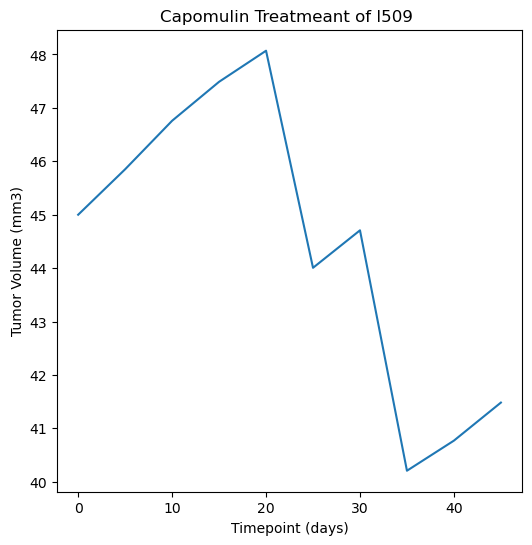

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse ID treated with Capomulin
mouse_id = "l509"  

# Filter the data for the selected mouse treated with Capomulin
mouse_data = clean_mice[(clean_mice["Mouse ID"] == mouse_id) & (clean_mice["Drug Regimen"] == "Capomulin")]

# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(6, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatmeant of {mouse_id} ')
plt.show()

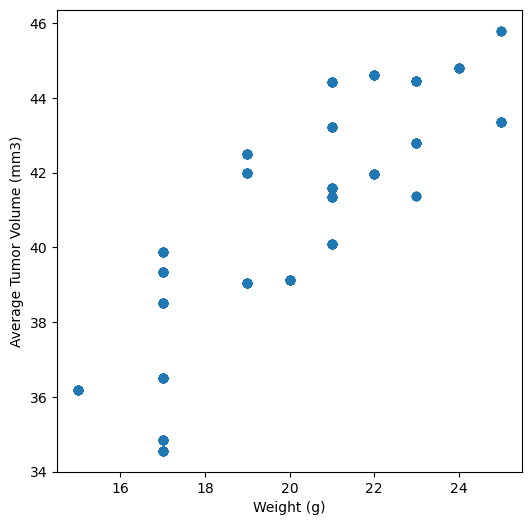

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = clean_mice[clean_mice["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_volume = avg_tumor_volume.reset_index()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, capomulin_data, on="Mouse ID")

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation coefficient and regression parameters: 0.83


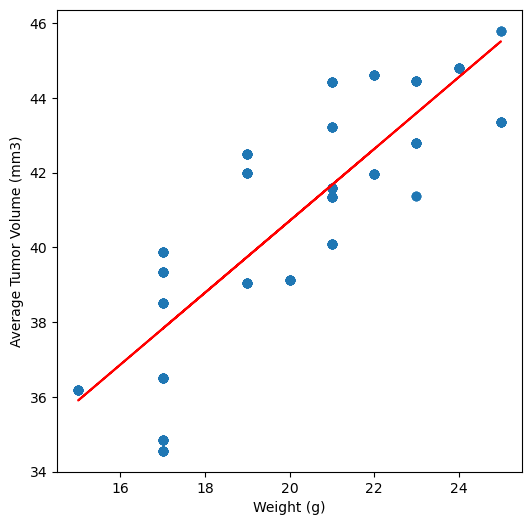

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = merged_data["Weight (g)"].corr(merged_data["Tumor Volume (mm3)_x"])
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"])
# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)_x"])

# Add the regression line to the plot
plt.plot(merged_data["Weight (g)"], slope * merged_data["Weight (g)"] + intercept, color='r')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('')

# Print the correlation coefficient and regression parameters
print(f"The correlation coefficient and regression parameters: {round(correlation, 2)}")